In [69]:
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
import seaborn as sns
import gc

sns.set()
warnings.filterwarnings("ignore")

In [70]:
df1 = pd.read_pickle("dataset2018.df") 
df2 = pd.read_pickle("dataset2019.df")
df = pd.concat([df1, df2])
del df1, df2
gc.collect()

5650

In [71]:
dataset = df[df.market.isin(["東証マザ"])]

In [72]:
def calc_updownratio(dataset, n=5):
    df = dataset.copy()
    df["close_1"] = df.groupby(df["code"])["close"].shift()
    df["cret"] = (df["close"] / df["close_1"]) - 1
    up_count = df.groupby(df.index)["cret"].apply(lambda x: (x>0).sum())
    down_count = df.groupby(df.index)["cret"].apply(lambda x: (x<=0).sum())
    
    upper_roll = up_count.rolling(n).sum()
    downer_roll = down_count.rolling(n).sum()
    return (upper_roll / downer_roll) * 100


def calc_updownratio_on(dataset, n=5):
    df = dataset.copy()
    df["close_1"] = df.groupby(df["code"])["close"].shift()
    df["cret"] = (df["opent"] / df["close_1"]) - 1
    up_count = df.groupby(df.index)["cret"].apply(lambda x: (x>0).sum())
    down_count = df.groupby(df.index)["cret"].apply(lambda x: (x<=0).sum())
    
    upper_roll = up_count.rolling(n).sum()
    downer_roll = down_count.rolling(n).sum()
    return (upper_roll / downer_roll) * 100

In [73]:
updownratio_5 = calc_updownratio(dataset, n=5)
updownratio_10 = calc_updownratio(dataset, n=10)
updownratio_20 = calc_updownratio(dataset, n=20)

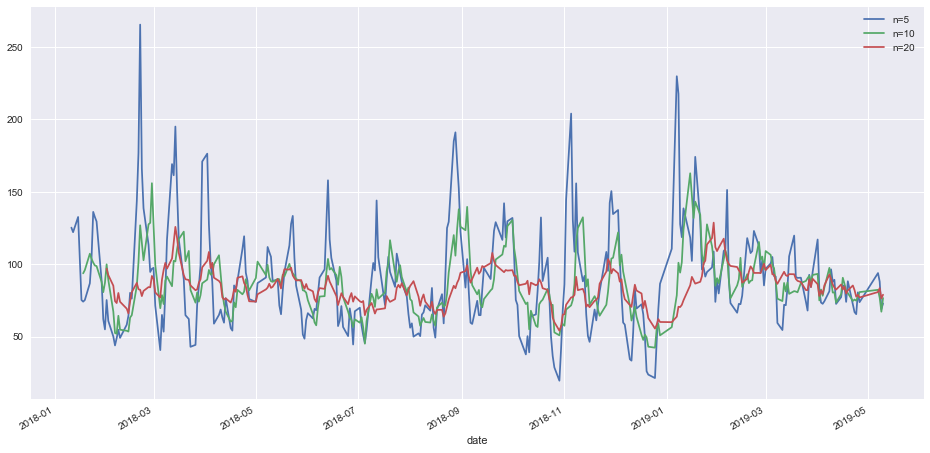

In [74]:
plt.figure(figsize=(16,8))
updownratio_5.plot(label="n=5")
updownratio_10.plot(label="n=10")
updownratio_20.plot(label="n=20")
plt.legend()

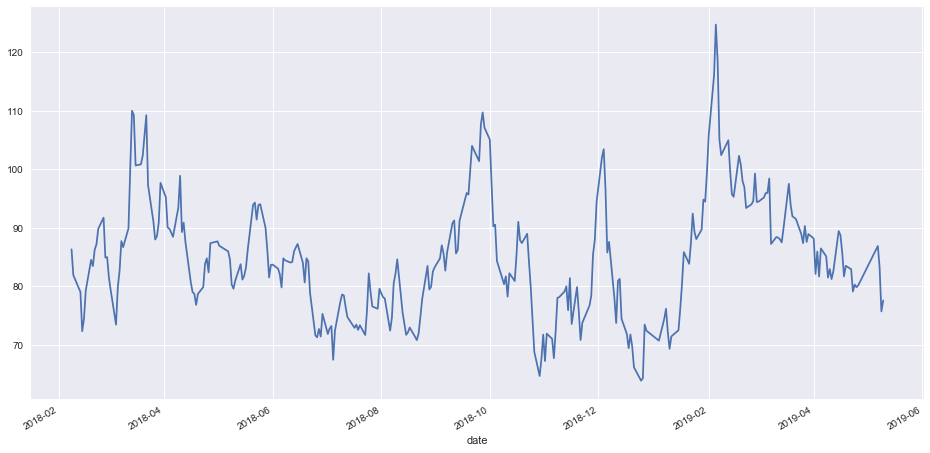

In [75]:
updownratio_25 = calc_updownratio(dataset, n=25)
updownratio_25.plot(figsize=(16,8))

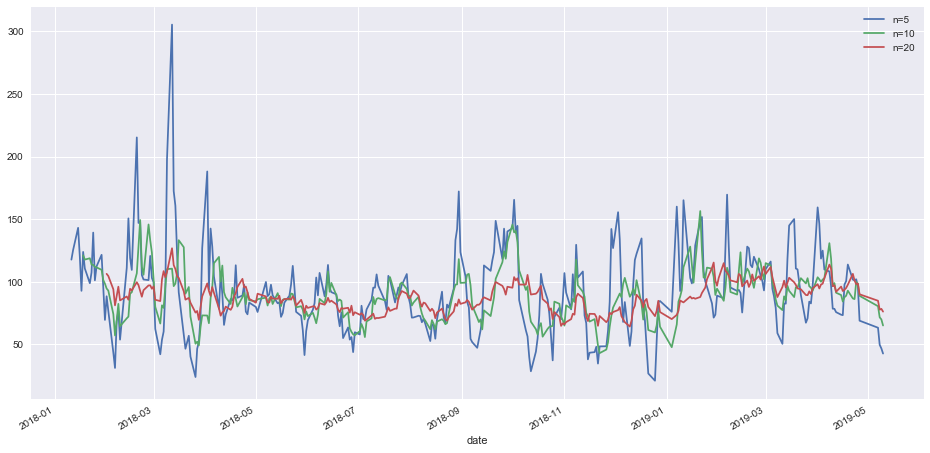

In [81]:
updownratio_on_5 = calc_updownratio_on(dataset, n=5)
updownratio_on_10 = calc_updownratio_on(dataset, n=10)
updownratio_on_20 = calc_updownratio_on(dataset, n=20)
updownratio_on_5.plot(label="n=5", figsize=(16,8))
updownratio_on_10.plot(label="n=10", figsize=(16,8))
updownratio_on_20.plot(label="n=20", figsize=(16,8))
plt.legend()

In [62]:
updownratio_on_5 = calc_updownratio_on(dataset, n=2)
updownratio_on_5.to_pickle("updownratio_on_5.df")

In [63]:
df = pd.DataFrame({"5":updownratio_on_5, "10":updownratio_on_10, "20": updownratio_on_20})

In [68]:
df.pct_change().dropna().corr()

,10,20,5
10,1.000000,0.484020,0.130742
20,0.484020,1.000000,0.130425
5,0.130742,0.130425,1.000000
